# 1. Setting up

Import all required modules

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits as digits
from sklearn import metrics

# 2. Inspecting the Data
We will look into identification of digits from images of the digits - a classic classification problem.

In [33]:
digits = digits()
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


Let's see how the first 5 samples look like.


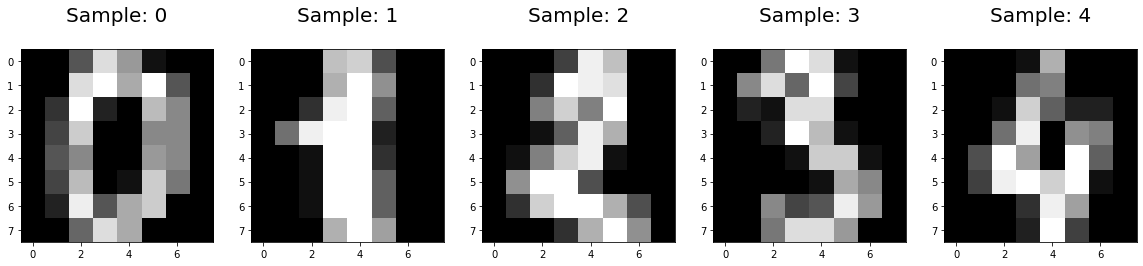

In [34]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Sample: %i\n' % label, fontsize = 20)

# 3. Pre-processing

Split the image data into a training and test set and then store the input and target data seperately for each set. Use [train/test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn.

In [35]:
# Split the data into a training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# 4. Creating and Training the Model

To create our logistic regression model, use [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from sklearn.

In [36]:
# all parameters not specified are set to their defaults
from sklearn.linear_model import LogisticRegression
# C is regularization hyperparameter
log_reg = LogisticRegression(C = 1.0)
log_reg.fit(x_train, y_train)

# Returns a NumPy Array
# Predict for One Observation (image)
# predict() takes a 2D array or dataframe
# reshape(nrow, ncol), where -1 means any
p = log_reg.predict(x_test[0].reshape(1, -1))
print(p)

[2]


/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predict for Multiple Observations (images) at once

In [37]:
log_reg.predict(x_test[0:3])

array([2, 8, 2])

Predict for the entire data set

In [38]:
predictions = log_reg.predict(x_test)

# 5. Measuring Classification Performance

Definitely show confusion matrix (explained in lecture), skip ROC curves
Accuracy is defined as the fraction of correct predictions: correct predictions / total predictions

### Accuracy

In [39]:
# Use score method to get accuracy of model
score = log_reg.score(x_test, y_test)
print(score)

0.9511111111111111


### Confusion Matrix

An unappealing matrix

In [40]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


A matrix using Seaborn

Text(0.5, 1.0, 'Accuracy Score: 0.9511111111111111')

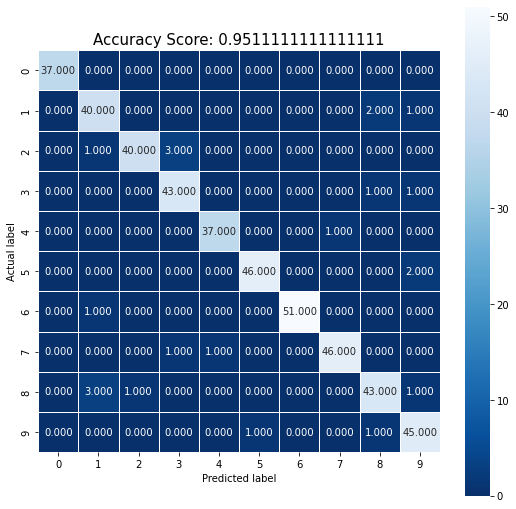

In [41]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

A matrix using Matplotlib

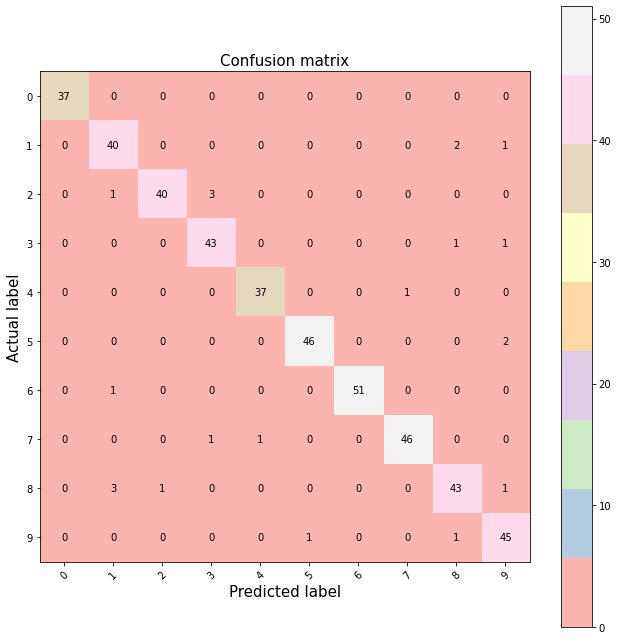

In [42]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')